In [51]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from pprint import pprint
%matplotlib inline

In [2]:
start = datetime(2004,1,1)
end = datetime(2017,1,1)
test_size=0.2

In [3]:
amzn = pdr.get_data_yahoo('AMZN', start, end)
amzn.drop(['Close', 'Volume'], axis=1, inplace=True)

In [4]:
amzn.columns = ['Open', 'High', 'Low', 'Close'] # Adj Close -> Close

In [5]:
amzn.head()

,Open,High,Low,Close
Date,,,,
2003-12-31,52.820000,53.480000,52.400002,52.619999
2004-01-02,52.759998,53.130001,51.430000,51.900002
2004-01-05,52.000000,53.599998,51.369999,53.270000
2004-01-06,53.110001,53.500000,52.740002,53.029999
2004-01-07,52.180000,52.660000,50.939999,51.900002


### Create percentage change list

In [6]:
amzn_pct = pd.concat((amzn, 
                      amzn.rolling(5, center=False, min_periods=5).mean(), 
                      amzn.rolling(10, center=False, min_periods=10).mean(), 
                      amzn.rolling(20, center=False, min_periods=20).mean(),
                      amzn.rolling(5, center=False, min_periods=5).std(), 
                      amzn.rolling(10, center=False, min_periods=10).std(),
                      amzn.rolling(20, center=False, min_periods=20).std()), 
                      axis=1).pct_change().iloc[20:]

In [7]:
amzn_pct.head()

,Open,High,Low,Close,Open,High,Low,Close,Open,High,...,Low,Close,Open,High,Low,Close,Open,High,Low,Close
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-30,-0.049001,-0.013254,0.014403,0.023974,-0.027542,-0.022361,-0.027232,-0.024755,-0.009427,-0.009595,...,0.010016,-0.029955,0.541553,0.324666,0.198441,0.149805,0.096546,0.058926,0.052293,0.046767
2004-02-02,0.023439,-0.014016,-0.027383,-0.042262,-0.022888,-0.024008,-0.031934,-0.033138,-0.010207,-0.010244,...,-0.116729,-0.134537,0.120360,0.206922,0.169722,0.195783,0.039191,0.071931,0.076759,0.102783
2004-02-03,-0.048569,-0.046792,-0.071533,-0.068987,-0.032527,-0.035528,-0.044009,-0.042255,-0.013542,-0.015488,...,-0.179780,-0.100098,0.206275,0.234228,0.241417,0.234450,0.108576,0.162572,0.182780,0.217156
2004-02-04,-0.070139,-0.049089,-0.004942,0.010013,-0.034762,-0.033254,-0.030249,-0.026839,-0.021112,-0.020271,...,-0.084889,-0.092761,0.256593,0.213614,0.105033,0.085841,0.225565,0.210227,0.130758,0.124417
2004-02-05,0.027226,0.025702,0.036117,0.014320,-0.024513,-0.020019,-0.011506,-0.013349,-0.020484,-0.020128,...,-0.074109,-0.043216,0.042002,0.020154,-0.023277,-0.023874,0.103987,0.098716,0.059107,0.075356


In [8]:
scale_to_idx = int((1-test_size)*len(amzn_pct))
scale_to_idx

2603

In [9]:
scaler = StandardScaler()
scaler.fit(amzn_pct[0:scale_to_idx])
amzn_pct = pd.DataFrame(scaler.transform(amzn_pct), columns=amzn_pct.columns, index=amzn_pct.index)

In [12]:
amzn_pct.head()

,Open,High,Low,Close,Open,High,Low,Close,Open,High,...,Low,Close,Open,High,Low,Close,Open,High,Low,Close
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-30,-1.887344,-0.574964,0.544316,0.845686,-2.438786,-2.025792,-2.417331,-2.169468,-1.241499,-1.290436,...,-0.143019,-0.150695,1.976958,1.022431,0.674185,0.488008,0.879444,0.466971,0.440513,0.380496
2004-02-02,0.845257,-0.605735,-1.153763,-1.599524,-2.037363,-2.170366,-2.823672,-2.882849,-1.337191,-1.371766,...,-0.301867,-0.259033,0.367099,0.616975,0.562804,0.666860,0.324887,0.582340,0.671926,0.901508
2004-02-03,-1.871044,-1.929414,-2.947863,-2.586122,-2.868854,-3.181107,-3.867332,-3.658699,-1.746371,-2.029901,...,-0.380886,-0.223357,0.695478,0.711006,0.840862,0.817274,0.995759,1.386463,1.674704,1.965315
2004-02-04,-2.684728,-2.022175,-0.241802,0.330305,-3.061671,-2.981606,-2.678090,-2.346866,-2.675294,-2.630120,...,-0.261963,-0.215756,0.887803,0.640019,0.311916,0.239192,2.126906,1.809228,1.182665,1.102737
2004-02-05,0.988110,0.998321,1.426711,0.489306,-2.177508,-1.820276,-1.058100,-1.198887,-2.598263,-2.612134,...,-0.248452,-0.164433,0.067605,-0.026164,-0.185720,-0.187593,0.951389,0.819962,0.504965,0.646405


### Helper class and functions

In [13]:
class TradeDTO:
    
    BUY = 'buy'
    SELL = 'sell'
    
    def __init__(self, pct_data, enter_day, exit_day, direction, hold_days, price_diff):
        self.pct_data = pct_data
        self.enter_day = enter_day
        self.exit_day = exit_day
        self.direction = direction
        self.hold_days = hold_days
        self.price_diff = price_diff
        
    def __repr__(self):
        return 'From {} to {} | enter {} | exit {} | {} | {} hold days | {} diff'.format(
            self.pct_data.iloc[0].name.date(),
            self.pct_data.iloc[-1].name.date(),
            self.enter_day.name.date(),
            self.exit_day.name.date(),
            self.direction,
            self.hold_days,
            self.price_diff)
    
    def to_label(self):
        return self.direction# + '_' + ('BREAKOUT' if self.hold_days <= 1 else 'NOPE')

### Parameters for trade collecting

In [14]:
min_hold_days = 1
max_hold_days = 10
hold_days_diff = max_hold_days - min_hold_days
window = 30

In [15]:
positions = []
for i in range(window, len(amzn_pct)-max_hold_days):
    from_idx = i - window
    to_idx = i + 1
    pct_data_part = amzn_pct.iloc[from_idx:to_idx]
    
    current_day = amzn.iloc[i]
    
    future_from_idx = i+min_hold_days
    future_to_idx = i+max_hold_days
    
    check_data_part = amzn.iloc[future_from_idx:future_to_idx]
    max_ev_date = np.argmax(np.abs(current_day['Close'] - check_data_part['Close']))
    target_day = check_data_part.loc[max_ev_date]
    
    day_diff = len(amzn[current_day.name:target_day.name]) - 1
    price_diff = target_day['Close'] - current_day['Close']
    direction = TradeDTO.BUY if price_diff > 0 else TradeDTO.SELL
    #print('- {} days: {} to {}'.format(str(day_diff), current_day.name.date(), target_day.name.date()))
    trade = TradeDTO(pct_data_part, current_day, target_day, direction, day_diff, price_diff)
    positions.append(trade)

In [16]:
np.random.shuffle(positions)

In [17]:
pprint(positions)

[From 2009-04-29 to 2009-06-11 | enter 2009-05-13 | exit 2009-05-26 | buy | 8 hold days | 4.199996999999996 diff,
 From 2009-08-17 to 2009-09-29 | enter 2009-08-31 | exit 2009-09-11 | buy | 8 hold days | 3.349998999999997 diff,
 From 2006-11-22 to 2007-01-09 | enter 2006-12-07 | exit 2006-12-15 | buy | 6 hold days | 1.889998999999996 diff,
 From 2014-01-13 to 2014-02-26 | enter 2014-01-28 | exit 2014-02-03 | sell | 4 hold days | -48.27999900000003 diff,
 From 2005-01-07 to 2005-02-22 | enter 2005-01-24 | exit 2005-02-04 | sell | 9 hold days | -4.659999999999997 diff,
 From 2006-11-30 to 2007-01-17 | enter 2006-12-14 | exit 2006-12-27 | buy | 8 hold days | 1.2700010000000006 diff,
 From 2011-05-10 to 2011-06-22 | enter 2011-05-24 | exit 2011-06-06 | sell | 8 hold days | -7.5800020000000075 diff,
 From 2016-03-14 to 2016-04-26 | enter 2016-03-29 | exit 2016-04-06 | buy | 6 hold days | 8.22003200000006 diff,
 From 2008-08-07 to 2008-09-19 | enter 2008-08-21 | exit 2008-09-04 | sell | 9 ho

 From 2014-05-05 to 2014-06-17 | enter 2014-05-19 | exit 2014-05-29 | buy | 7 hold days | 17.01998900000001 diff,
 From 2013-10-08 to 2013-11-19 | enter 2013-10-22 | exit 2013-10-31 | buy | 7 hold days | 31.489990000000034 diff,
 From 2011-12-19 to 2012-02-02 | enter 2012-01-04 | exit 2012-01-18 | buy | 9 hold days | 11.93000699999999 diff,
 From 2012-01-18 to 2012-03-01 | enter 2012-02-01 | exit 2012-02-13 | buy | 8 hold days | 12.129988999999966 diff,
 From 2008-10-31 to 2008-12-15 | enter 2008-11-14 | exit 2008-11-20 | sell | 4 hold days | -6.720001000000003 diff,
 From 2006-03-23 to 2006-05-05 | enter 2006-04-06 | exit 2006-04-17 | sell | 6 hold days | -3.239997999999993 diff,
 From 2004-03-19 to 2004-05-03 | enter 2004-04-02 | exit 2004-04-08 | buy | 4 hold days | 2.009997999999996 diff,
 From 2013-06-18 to 2013-07-31 | enter 2013-07-02 | exit 2013-07-12 | buy | 7 hold days | 23.819976999999994 diff,
 From 2007-03-29 to 2007-05-11 | enter 2007-04-13 | exit 2007-04-26 | buy | 9 hol

 From 2014-12-26 to 2015-02-10 | enter 2015-01-12 | exit 2015-01-23 | buy | 8 hold days | 20.98001099999999 diff,
 From 2009-08-11 to 2009-09-23 | enter 2009-08-25 | exit 2009-09-02 | sell | 6 hold days | -6.050003000000004 diff,
 From 2011-01-07 to 2011-02-22 | enter 2011-01-24 | exit 2011-01-27 | buy | 3 hold days | 7.599990999999989 diff,
 From 2009-03-23 to 2009-05-05 | enter 2009-04-06 | exit 2009-04-15 | sell | 6 hold days | -3.2799990000000037 diff,
 From 2013-10-29 to 2013-12-11 | enter 2013-11-12 | exit 2013-11-25 | buy | 9 hold days | 27.110015999999973 diff,
 From 2005-07-20 to 2005-08-31 | enter 2005-08-03 | exit 2005-08-12 | sell | 7 hold days | -1.9100000000000037 diff,
 From 2016-02-01 to 2016-03-15 | enter 2016-02-16 | exit 2016-02-22 | buy | 4 hold days | 38.40002400000003 diff,
 From 2016-08-15 to 2016-09-27 | enter 2016-08-29 | exit 2016-09-06 | buy | 5 hold days | 17.580016999999998 diff,
 From 2004-05-28 to 2004-07-14 | enter 2004-06-15 | exit 2004-06-28 | buy | 9 

 From 2013-10-22 to 2013-12-04 | enter 2013-11-05 | exit 2013-11-07 | sell | 2 hold days | -15.330016999999998 diff,
 From 2012-05-29 to 2012-07-11 | enter 2012-06-12 | exit 2012-06-19 | buy | 5 hold days | 7.6100010000000395 diff,
 From 2014-07-10 to 2014-08-21 | enter 2014-07-24 | exit 2014-08-01 | sell | 6 hold days | -51.54998699999999 diff,
 From 2011-11-22 to 2012-01-06 | enter 2011-12-07 | exit 2011-12-19 | sell | 8 hold days | -15.990004999999996 diff,
 From 2016-03-16 to 2016-04-28 | enter 2016-03-31 | exit 2016-04-13 | buy | 9 hold days | 21.17999199999997 diff,
 From 2009-12-16 to 2010-02-01 | enter 2009-12-31 | exit 2010-01-12 | sell | 7 hold days | -7.170006000000001 diff,
 From 2009-06-02 to 2009-07-15 | enter 2009-06-16 | exit 2009-06-23 | sell | 5 hold days | -4.470001999999994 diff,
 From 2013-04-15 to 2013-05-28 | enter 2013-04-29 | exit 2013-05-10 | buy | 9 hold days | 13.890000000000015 diff,
 From 2015-01-28 to 2015-03-12 | enter 2015-02-11 | exit 2015-02-25 | buy 

# Train Keras NN

### Setup X_train, X_test, etc

In [18]:
X = np.array([x.pct_data.values for x in positions])
X.shape

(3214, 31, 28)

In [19]:
lb = LabelBinarizer()
y = lb.fit_transform([x.to_label() for x in positions])
if y.shape[1] == 1:
    y = np.hstack((y, 1 - y))
y.shape

(3214, 2)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

Scaling dataset size should be equal to the train set + window size

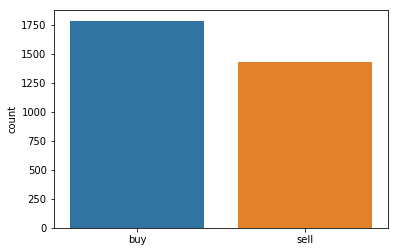

In [21]:
sns.countplot([x.to_label() for x in positions])

### Build model

In [22]:
batch_size = 64
epochs = 150

In [23]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.losses import mean_squared_error, categorical_crossentropy
from keras.optimizers import Adam
from keras import metrics

Using TensorFlow backend.


In [24]:
model = Sequential()
model.add(Conv1D(32,  3, activation='relu', padding='same', input_shape=X[0].shape))
model.add(Conv1D(64,  4, activation='relu', padding='same'))
model.add(Conv1D(128, 5, activation='relu', padding='same'))
model.add(Conv1D(256, 6, activation='relu', padding='same'))

In [25]:
model.add(Flatten())

for i in range(6,0,-1):
    model.add(Dense(i*64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

model.add(Dense(y.shape[1]))
model.add(Activation('softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=[metrics.mae, metrics.categorical_accuracy])

In [26]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=3)
print("Accuracy: %.2f%%" % (scores[2]*100))

Train on 2571 samples, validate on 643 samples
Epoch 1/150
2571/2571 [==============================] - 8s - loss: 0.7075 - mean_absolute_error: 0.4947 - categorical_accuracy: 0.5150 - val_loss: 0.6637 - val_mean_absolute_error: 0.4827 - val_categorical_accuracy: 0.5754
Epoch 2/150
2571/2571 [==============================] - 2s - loss: 0.6043 - mean_absolute_error: 0.4172 - categorical_accuracy: 0.6309 - val_loss: 0.6104 - val_mean_absolute_error: 0.4505 - val_categorical_accuracy: 0.7574
Epoch 3/150
2571/2571 [==============================] - 2s - loss: 0.4957 - mean_absolute_error: 0.3431 - categorical_accuracy: 0.7884 - val_loss: 0.4409 - val_mean_absolute_error: 0.3264 - val_categorical_accuracy: 0.8289
Epoch 4/150
2571/2571 [==============================] - 2s - loss: 0.4281 - mean_absolute_error: 0.2949 - categorical_accuracy: 0.8452 - val_loss: 0.4082 - val_mean_absolute_error: 0.2876 - val_categorical_accuracy: 0.8227
Epoch 5/150
2571/2571 [==============================] - 

2571/2571 [==============================] - 2s - loss: 0.0303 - mean_absolute_error: 0.0185 - categorical_accuracy: 0.9879 - val_loss: 0.4044 - val_mean_absolute_error: 0.0800 - val_categorical_accuracy: 0.9269
Epoch 37/150
2571/2571 [==============================] - 2s - loss: 0.0301 - mean_absolute_error: 0.0110 - categorical_accuracy: 0.9903 - val_loss: 0.5117 - val_mean_absolute_error: 0.0859 - val_categorical_accuracy: 0.9176
Epoch 38/150
2571/2571 [==============================] - 2s - loss: 0.0356 - mean_absolute_error: 0.0181 - categorical_accuracy: 0.9879 - val_loss: 0.2686 - val_mean_absolute_error: 0.0899 - val_categorical_accuracy: 0.9160
Epoch 39/150
2571/2571 [==============================] - 2s - loss: 0.0176 - mean_absolute_error: 0.0102 - categorical_accuracy: 0.9946 - val_loss: 0.3339 - val_mean_absolute_error: 0.0842 - val_categorical_accuracy: 0.917607 - catego
Epoch 40/150
2571/2571 [==============================] - 2s - loss: 0.0076 - mean_absolute_error: 0.0

2571/2571 [==============================] - 2s - loss: 0.0439 - mean_absolute_error: 0.0173 - categorical_accuracy: 0.9914 - val_loss: 0.5263 - val_mean_absolute_error: 0.1024 - val_categorical_accuracy: 0.9036s - loss: 0.0470 - mean_absolute_error: 0.0
Epoch 73/150
2571/2571 [==============================] - 2s - loss: 0.0246 - mean_absolute_error: 0.0123 - categorical_accuracy: 0.9922 - val_loss: 0.4953 - val_mean_absolute_error: 0.0818 - val_categorical_accuracy: 0.9253
Epoch 74/150
2571/2571 [==============================] - 2s - loss: 0.0063 - mean_absolute_error: 0.0034 - categorical_accuracy: 0.9981 - val_loss: 0.5455 - val_mean_absolute_error: 0.0782 - val_categorical_accuracy: 0.9222
Epoch 75/150
2571/2571 [==============================] - 2s - loss: 0.0011 - mean_absolute_error: 9.9522e-04 - categorical_accuracy: 1.0000 - val_loss: 0.6231 - val_mean_absolute_error: 0.0779 - val_categorical_accuracy: 0.9207
Epoch 76/150
2571/2571 [==============================] - 2s - los

2571/2571 [==============================] - 2s - loss: 6.4094e-04 - mean_absolute_error: 5.4899e-04 - categorical_accuracy: 0.9996 - val_loss: 0.6986 - val_mean_absolute_error: 0.0807 - val_categorical_accuracy: 0.9222
Epoch 107/150
2571/2571 [==============================] - 2s - loss: 5.3657e-04 - mean_absolute_error: 4.6691e-04 - categorical_accuracy: 1.0000 - val_loss: 0.7448 - val_mean_absolute_error: 0.0793 - val_categorical_accuracy: 0.9222
Epoch 108/150
2571/2571 [==============================] - 2s - loss: 6.1828e-04 - mean_absolute_error: 4.9889e-04 - categorical_accuracy: 0.9996 - val_loss: 0.7646 - val_mean_absolute_error: 0.0790 - val_categorical_accuracy: 0.9238 - mean_absolute_error: 5.6161e-04 - categorical_accuracy: 0. - ETA: 0s - loss: 6.6939e-04 - mean_absolute_error: 5.3978e-04 - categorical_accuracy
Epoch 109/150
2571/2571 [==============================] - 2s - loss: 2.7867e-04 - mean_absolute_error: 2.5773e-04 - categorical_accuracy: 1.0000 - val_loss: 0.7677 

2571/2571 [==============================] - 2s - loss: 0.0027 - mean_absolute_error: 0.0017 - categorical_accuracy: 0.9988 - val_loss: 0.6133 - val_mean_absolute_error: 0.0728 - val_categorical_accuracy: 0.9316 0s - loss: 0.0033 - mean_absolute_error: 0.0020 - categorica
Epoch 141/150
2571/2571 [==============================] - 2s - loss: 0.0086 - mean_absolute_error: 0.0016 - categorical_accuracy: 0.9988 - val_loss: 0.7267 - val_mean_absolute_error: 0.0742 - val_categorical_accuracy: 0.9269
Epoch 142/150
2571/2571 [==============================] - 2s - loss: 0.0019 - mean_absolute_error: 0.0013 - categorical_accuracy: 0.9992 - val_loss: 0.6724 - val_mean_absolute_error: 0.0688 - val_categorical_accuracy: 0.9316
Epoch 143/150
2571/2571 [==============================] - 2s - loss: 0.0015 - mean_absolute_error: 7.3372e-04 - categorical_accuracy: 0.9996 - val_loss: 0.7147 - val_mean_absolute_error: 0.0703 - val_categorical_accuracy: 0.9300
Epoch 144/150
2571/2571 [====================

In [41]:
predicted = model.predict(X_test, batch_size=32)

In [48]:
predicted = predicted.argmax(axis=1)

In [49]:
y_test = y_test.argmax(axis=1)

In [50]:
confusion_matrix(y_test, predicted)

array([[238,  35],
       [ 15, 355]], dtype=int64)

In [53]:
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.94      0.87      0.90       273
          1       0.91      0.96      0.93       370

avg / total       0.92      0.92      0.92       643

